In [94]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [391]:
data=pd.read_csv('household_power_consumption.txt', sep=";")

In [394]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [395]:
data.count()

Date                     2075259
Time                     2075259
Global_active_power      2075259
Global_reactive_power    2075259
Voltage                  2075259
Global_intensity         2075259
Sub_metering_1           2075259
Sub_metering_2           2075259
Sub_metering_3           2049280
dtype: int64

In [397]:
data = data.replace('?',np.nan)

In [398]:
data['Global_active_power'] = data['Global_active_power'].astype('float')
data['Global_reactive_power'] = data['Global_reactive_power'].astype('float')
data['Sub_metering_1'] = data['Sub_metering_1'].astype('float')
data['Sub_metering_2'] = data['Sub_metering_2'].astype('float')
data['Sub_metering_3'] = data['Sub_metering_3'].astype('float')
data['Voltage'] = data['Voltage'].astype('float')
data['Global_intensity'] = data['Global_intensity'].astype('float')

In [399]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Calculate Global Active Energy

In [400]:
data['Global_Active_Energy'] = data['Global_active_power']*1000/60 - data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3'] 

In [405]:
data.to_csv('file.csv', index=False)

## The Saved CSV file can now be ingested to the Linux Server for futher processing

In [406]:
data = pd.read_csv("household_powerconsumption.csv", parse_dates=[['Date','Time']])

In [407]:
data.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_Active_Energy
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [408]:
df_n = data.groupby(pd.Grouper(key='Date_Time', freq='1D')).mean()

In [409]:
df_n.isna().sum()

Global_active_power      24
Global_reactive_power    24
Voltage                  24
Global_intensity         24
Sub_metering_1           24
Sub_metering_2           24
Sub_metering_3           24
Global_Active_Energy     24
dtype: int64

In [410]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df[['Global_Active_Energy']])
df_n[['Global_Active_Energy']]=imputer.transform(df_n[['Global_Active_Energy']])

In [411]:
imputer.fit(df_n[['Sub_metering_1']])
df_n[['Sub_metering_1']]=imputer.transform(df_n[['Sub_metering_1']])
imputer.fit(df_n[['Sub_metering_2']])
df_n[['Sub_metering_2']]=imputer.transform(df_n[['Sub_metering_2']])
imputer.fit(df_n[['Sub_metering_3']])
df_n[['Sub_metering_3']]=imputer.transform(df_n[['Sub_metering_3']])

## Plot Time Series

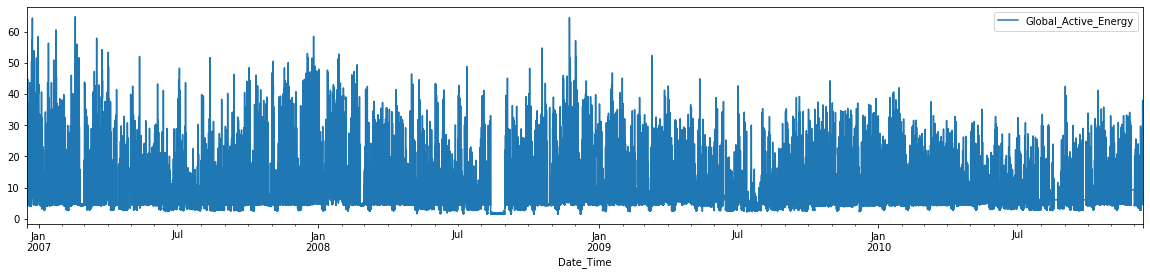

In [216]:
import matplotlib.pyplot as plt
df.plot(figsize=(20,4))
plt.show()

### Analyse Sub Metering 1

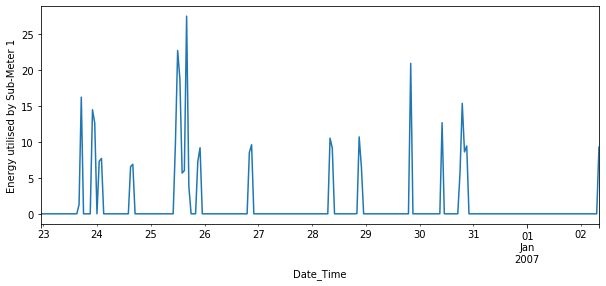

In [297]:
import matplotlib.pyplot as plt
df_n['Sub_metering_1'][150:400].plot(figsize=(10,4))
plt.xlabel("Date_Time")
plt.ylabel("Energy utilised by Sub-Meter 1")
plt.show()

### Analyse Sub Metering 2

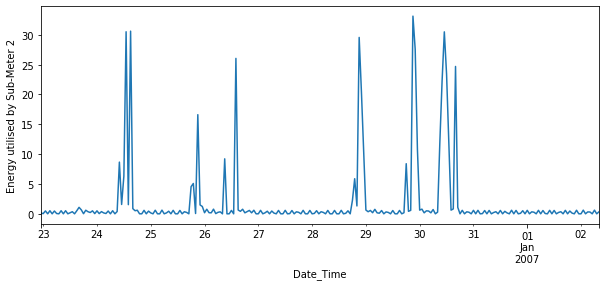

In [298]:
import matplotlib.pyplot as plt
df_n['Sub_metering_2'][150:400].plot(figsize=(10,4))
plt.xlabel("Date_Time")
plt.ylabel("Energy utilised by Sub-Meter 2### Analyse Sub Metering 1")
plt.show()

### Analyse Sub Metering 3

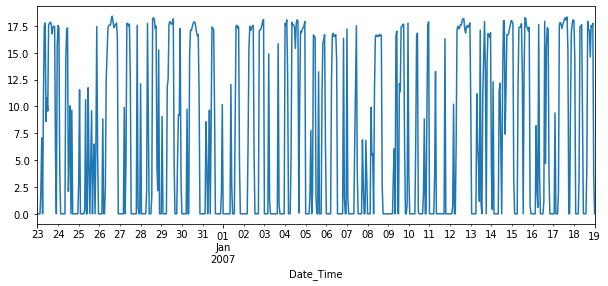

In [305]:
import matplotlib.pyplot as plt
df_n['Sub_metering_3'][150:800].plot(figsize=(10,4))
plt.show()

## Test Stationarity

In [126]:
def test_stationarity(timeseries):
         
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    #print(dftest)
    print(dfoutput)

In [127]:
test_stationarity(df)

Results of Dickey-Fuller Test:
Test Statistic                  -20.157334
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1456.000000
Critical Value (1%)              -3.434849
Critical Value (5%)              -2.863527
Critical Value (10%)             -2.567828
dtype: float64


## ACF and PACF plots

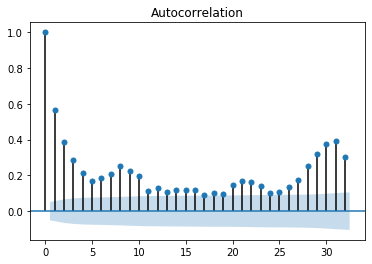

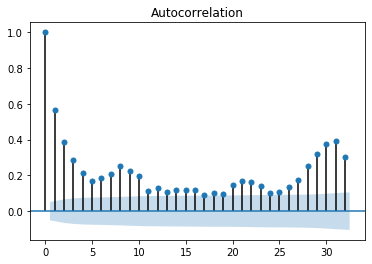

In [317]:
#ACF and PACF plots

lag_acf = plot_acf(df_n['Global_Active_Energy'])
display(lag_acf)

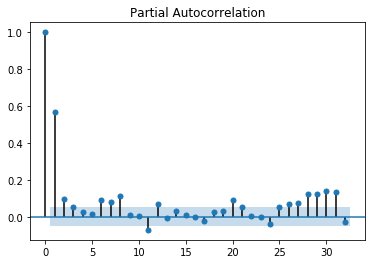

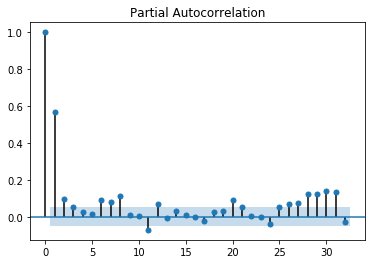

In [318]:
lag_pacf = plot_pacf(df_n['Global_Active_Energy'])
display(lag_pacf)